In [56]:
# data loading

from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import os

# defining our own Dataset class

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

class UdacityDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.camera_csv = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.camera_csv)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        path = os.path.join(self.root_dir, self.camera_csv['filename'][idx])
        image = io.imread(path)
        timestamp = self.camera_csv['timestamp'][idx]
        frame_id = self.camera_csv['frame_id'][idx]
        angle = self.camera_csv['angle'][idx]
        
        if self.transform:
            image = self.transform(image)
            
        sample = {'image': image,
                  'timestamp': timestamp,
                  'frame_id': frame_id,
                  'angle': angle}
            
        return sample

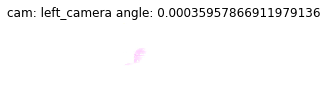

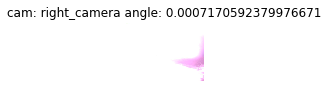

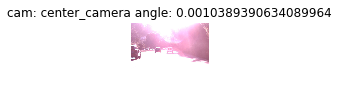

type of image data:
<class 'torch.Tensor'>


In [55]:
# test the UdacityDataset class

def show_sample(sample):
    plt.imshow(sample['image'])
    plt.title("cam: {} angle: {}".format(sample['frame_id'], sample['angle']))

# to load as normal images:    

udacity_dataset = UdacityDataset(csv_file='/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export/interpolated.csv',
                                 root_dir='/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export/',
                                 transform=None)

fig = plt.figure()

for i in range(3):
    sample = udacity_dataset[i]
    ax = plt.subplot(1, 4, i%4+1)
    plt.tight_layout()
    ax.axis('off')
    show_sample(sample)
    plt.pause(0.001)
    
    if i % 4 == 0:
        plt.show()

# to load as tensors

udacity_dataset = UdacityDataset(csv_file='/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export/interpolated.csv',
                                 root_dir='/export/jupyterlab/data/udacity-challenge-2/Ch2_002_export/',
                                 transform=transforms.Compose([transforms.ToTensor()]))

print("type of image data:")
print(type(udacity_dataset[0]['image']))